<a href="https://colab.research.google.com/github/Dcastor21/Anomaly-dection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df = pd.read_excel("FinancialMarketData.xlsx", sheet_name="EWS")
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388,157.26,100.56,105.86,1.6460,25.77,...,116.4635,230.5267,123.7616,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405,165.01,101.86,105.47,1.6383,28.85,...,117.2674,231.3770,123.7616,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368,167.24,102.41,106.04,1.6496,28.28,...,117.9946,232.3895,123.7616,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311,166.85,104.92,107.85,1.6106,28.22,...,120.5100,231.9417,122.3281,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277,165.43,104.22,109.30,1.6108,28.02,...,118.7914,237.8117,122.3281,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [3]:
df.describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,2010-08-31 00:00:00,987.463744,0.036153,2259.860486,245.247649,90.934982,106.605734,1.569618,60.708101,...,232.109928,704.379495,259.052663,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
min,0.000000,2000-01-11 00:00:00,256.680000,-0.974000,291.000000,106.292900,71.329000,75.940000,1.172300,10.010000,...,80.796800,230.526700,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,2005-05-06 12:00:00,433.740000,-0.191000,990.000000,184.705650,81.240500,101.565000,1.417900,39.625000,...,131.025000,434.660700,205.315550,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,2010-08-31 00:00:00,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562200,57.400000,...,213.205200,714.807100,264.770200,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,2015-12-25 12:00:00,1324.825000,0.260500,2685.500000,301.539250,97.404000,116.220000,1.677050,79.640000,...,342.884600,939.824600,320.753150,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2021-04-20 00:00:00,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085200,140.970000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000
std,0.409837,NaN,494.623740,0.349453,2017.811888,68.278081,11.379095,12.840754,0.212340,25.900813,...,109.917622,309.951768,75.934443,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356


In [4]:
df[df['Y']==0].describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,2011-02-07 03:49:00.961098240,990.433593,0.052664,2347.495423,247.881146,90.323585,107.616281,1.579915,61.653707,...,244.111586,731.721094,265.240162,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
min,0.0,2000-01-11 00:00:00,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206200,18.080000,...,81.986300,230.526700,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,2005-08-31 18:00:00,448.992500,-0.173750,1019.000000,186.208075,81.486750,102.810000,1.401300,44.560000,...,143.396150,457.186825,206.406075,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,2011-03-04 12:00:00,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574300,58.350000,...,229.733600,733.677650,275.519950,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,2016-07-24 06:00:00,1314.617500,0.251250,2959.250000,301.856375,96.734750,115.855000,1.742650,78.157500,...,348.385275,1003.778275,323.489850,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2021-04-20 00:00:00,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.067500,138.740000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000
std,0.0,NaN,472.840491,0.335677,2014.431535,66.348149,10.483254,11.547186,0.221346,24.492175,...,109.666420,306.805161,73.623337,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759


In [5]:
df[df['Y']==1].describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,2009-01-17 08:54:41.012658176,976.511646,-0.024734,1936.683544,235.535935,93.189671,102.879072,1.531644,57.220928,...,187.850646,603.550140,236.234628,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
min,1.0,2000-02-08 00:00:00,256.680000,-0.974000,345.000000,106.292900,72.369000,75.940000,1.172300,10.010000,...,80.796800,237.811700,122.001900,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,2002-08-13 00:00:00,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442200,29.480000,...,106.475000,278.382700,144.784300,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,2009-02-24 00:00:00,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.532800,45.940000,...,150.306600,554.560000,247.688900,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,2012-05-15 00:00:00,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585300,86.890000,...,239.938500,810.849400,302.005500,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,2020-11-03 00:00:00,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085200,140.970000,...,418.687500,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000
std,0.0,NaN,568.765356,0.390920,2001.477121,74.312587,13.999697,16.265108,0.170266,30.343985,...,99.179149,301.127771,80.027543,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389


In [6]:
num_df= df.select_dtypes(include=[np.number])
num_df.corr()


,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093167,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422104,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188246,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756704,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241705,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793957,0.785613,-0.190060,...,-0.315491,-0.218548,-0.045101,-0.458623,-0.261606,-0.235202,0.641511,0.761661,-0.210901,-0.031606
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544945,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386865,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008639,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093167,-0.422104,-0.188246,0.756704,0.793957,-0.544945,-0.008639,1.000000,0.352767,-0.124493,...,-0.598617,-0.549059,-0.402403,-0.594626,-0.246367,-0.113763,0.224708,0.530931,-0.501970,-0.329377
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785613,-0.816378,-0.608209,0.352767,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124493,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


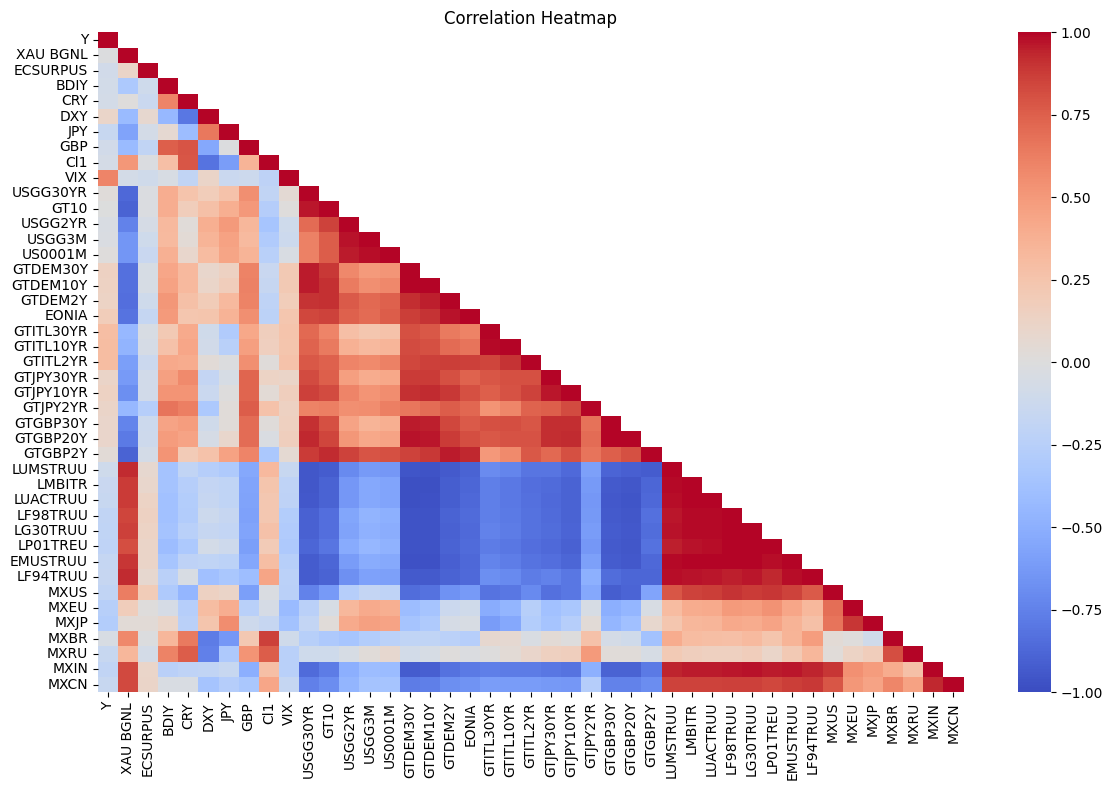

In [7]:
corr_matrix = num_df.corr()
upper_trangle =np.triu(corr_matrix)
mask =np.triu(np.ones_like(corr_matrix), k=1)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',vmin=-1, vmax=1, center=0, mask = mask)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [8]:
correlations = num_df.corr()['Y'].sort_values(ascending=False)
print(f"Top Features correlations with target:\n {correlations}")

Top Features correlations with target:
 Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100130
GTGBP30Y     0.099777
GTGBP2Y      0.035003
USGG30YR     0.019260
US0001M      0.015375
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025927
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093167
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype

<ipython-input-11-d07372bb8b53>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-11-d07372bb8b53>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-11-d07372bb8b53>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-11-d07372bb8b53>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1

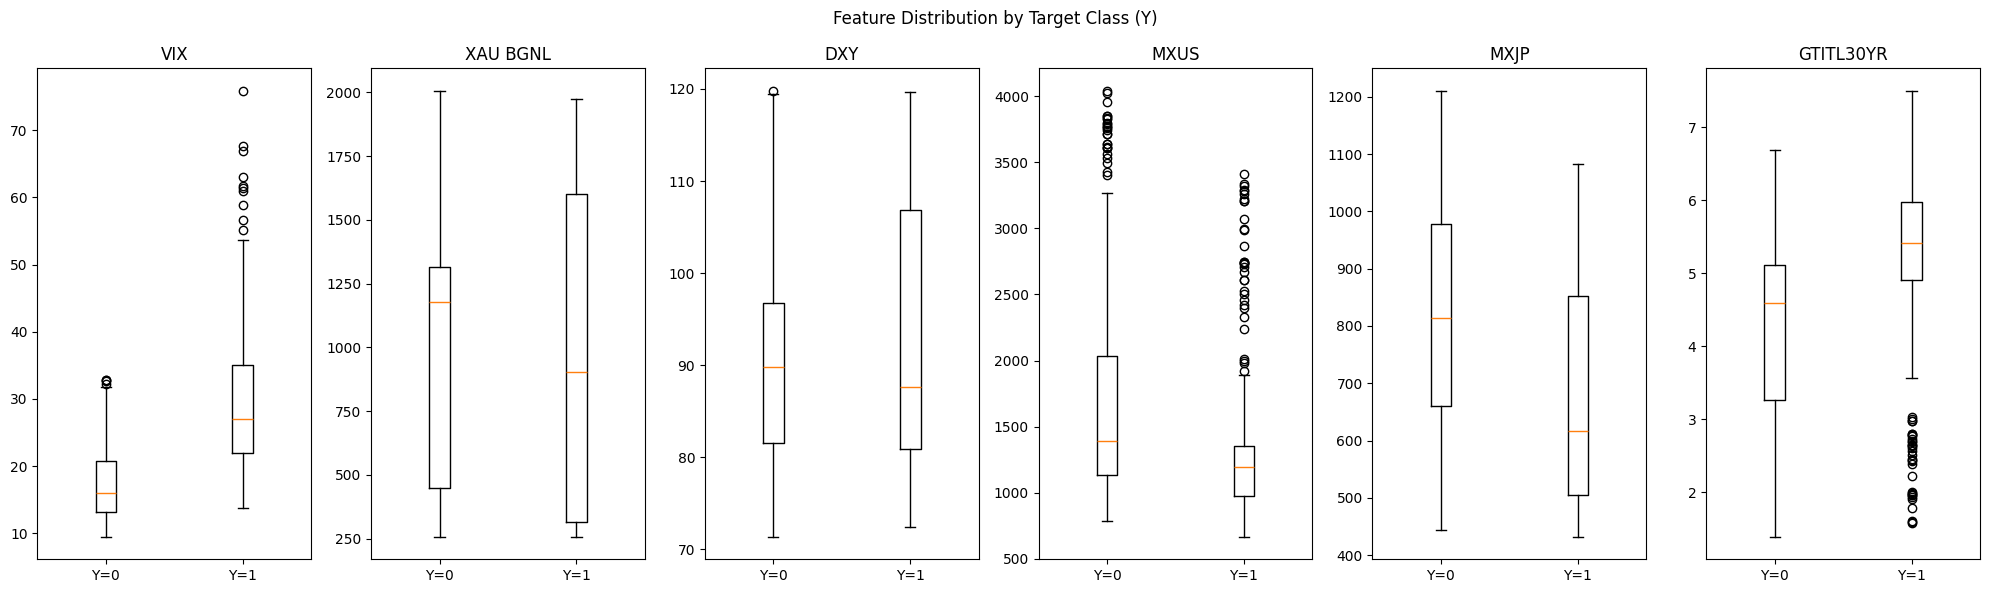

In [11]:
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'MXUS', "MXJP", "GTITL30YR"]
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distribution by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
    axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<ipython-input-12-89152e52cf42>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-12-89152e52cf42>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-12-89152e52cf42>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
<ipython-input-12-89152e52cf42>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1

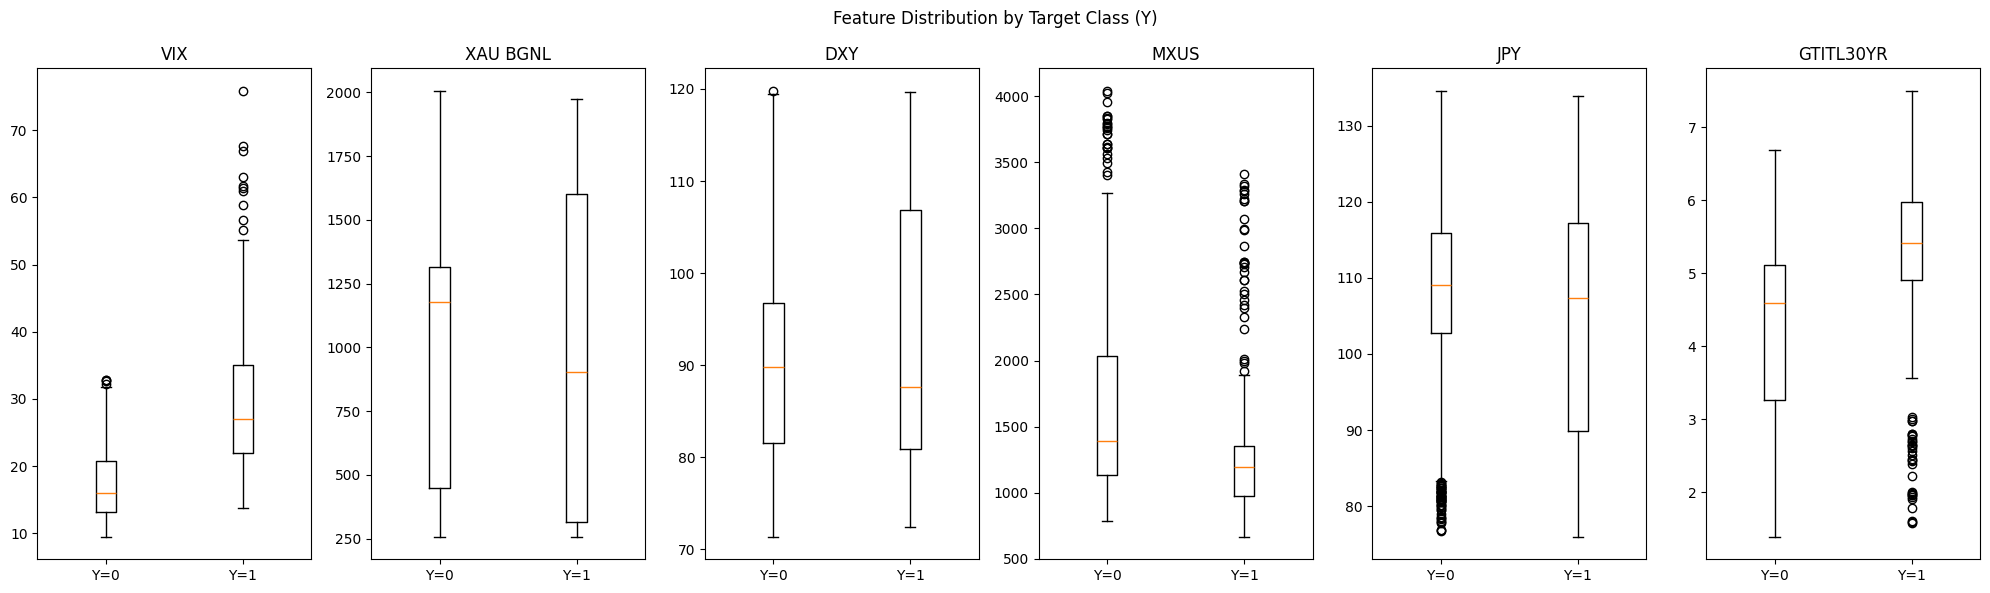

In [12]:
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'MXUS', "JPY", "GTITL30YR"]
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distribution by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
    axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

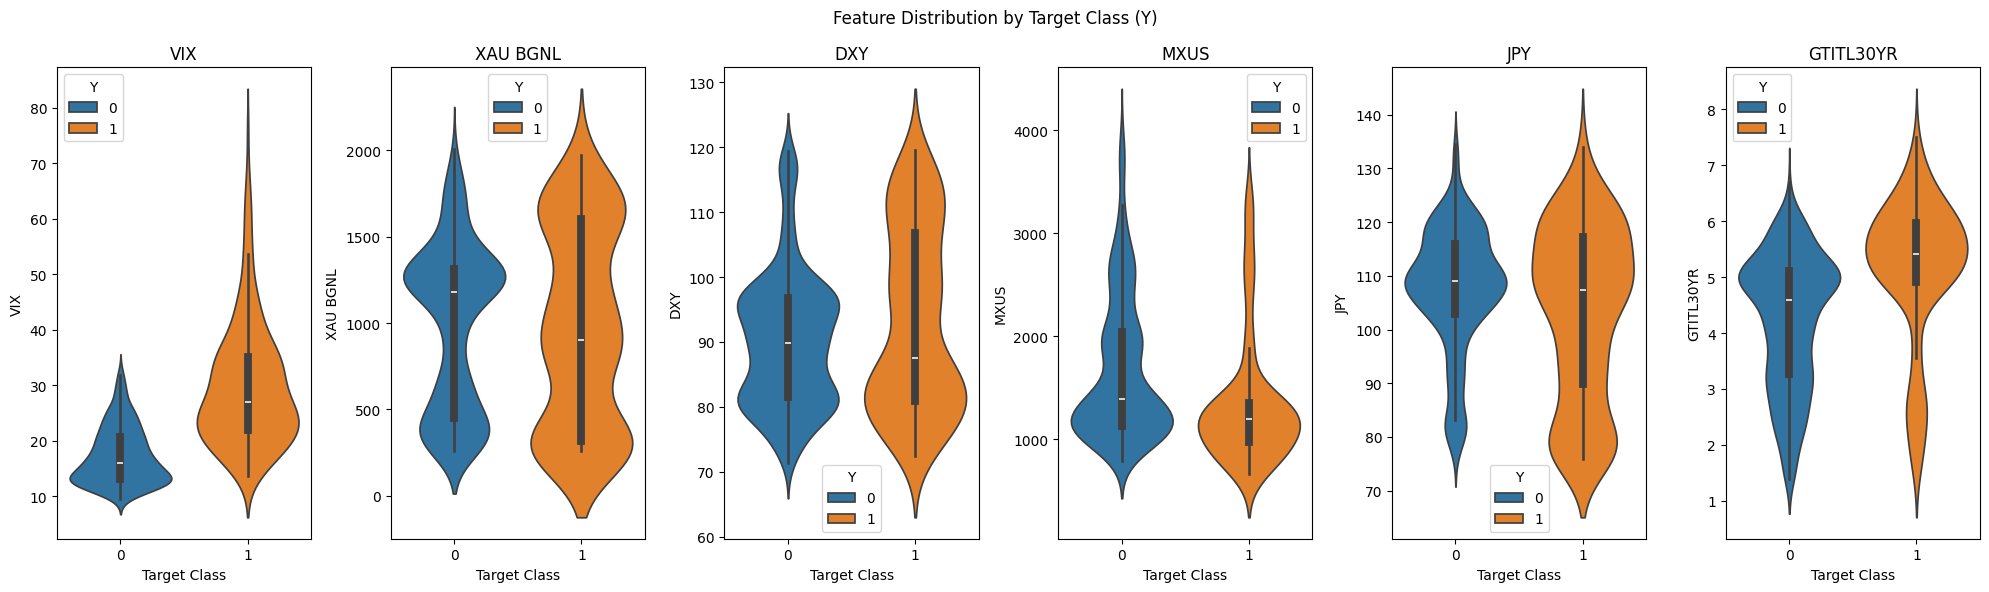

In [14]:
plt.figure(figsize=(20,6))

fig,axes =plt.subplots(1, len(cols_to_plot), figsize=(20,6))
fig.suptitle('Feature Distribution by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
  sns.violinplot(
      data=df,
      x='Y',
      y=col,
      hue='Y',
      ax=axes[i],
      inner='box'
  )
  axes[i].set_title(col)
  axes[i].set_xlabel('Target Class')
plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

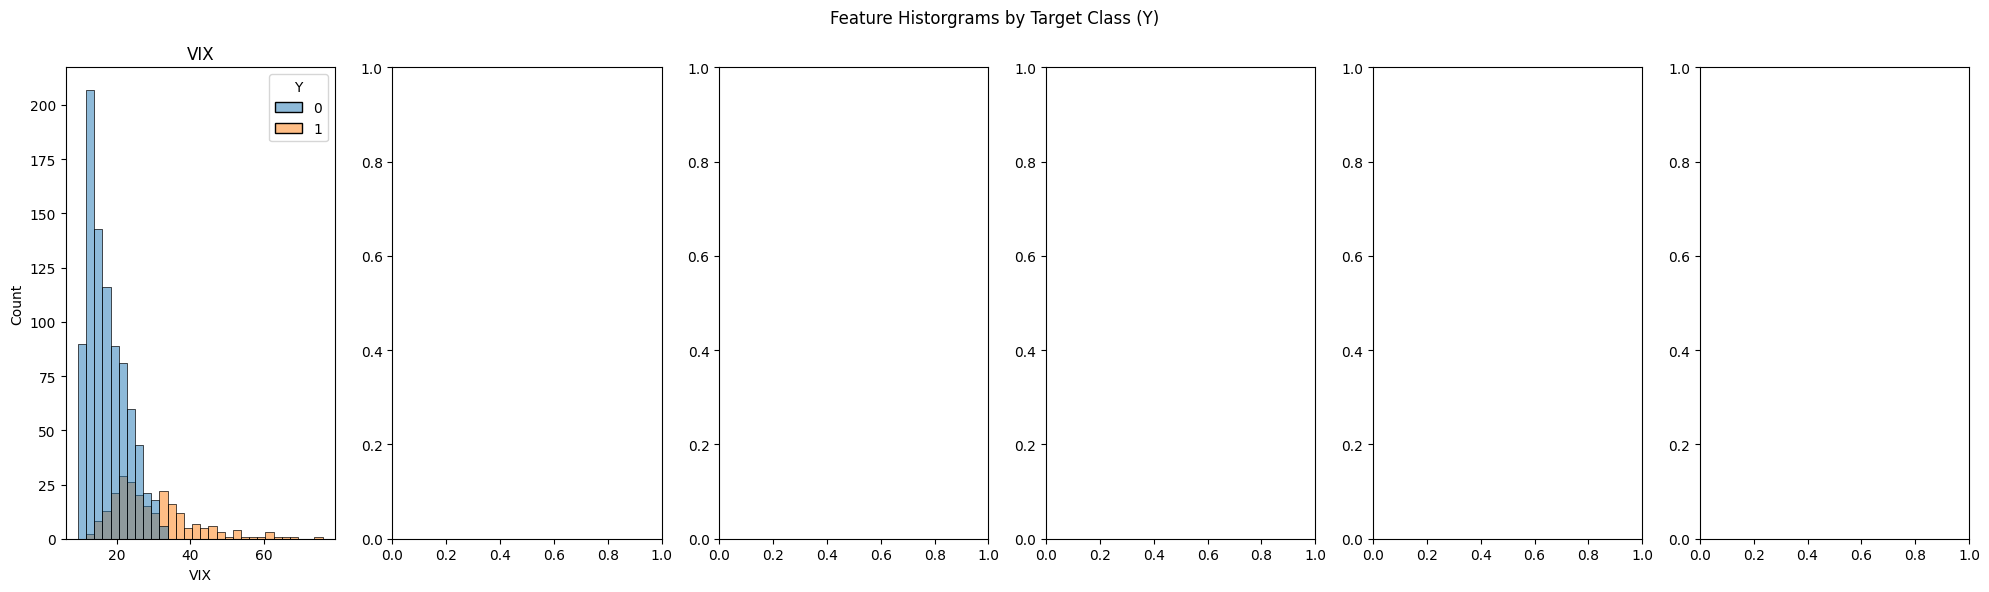

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(20,6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Historgrams by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
  sns.histplot(
      data=df,
      x=col,
      hue='Y',
      ax=axes[i],
      multiple='layer',
      alpha =0.5,
      bins=30
)
  axes[i].set_title(col)

  plt.tight_layout()
  plt.show()

In [26]:
X=  df[['VIX']]
y= df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


print(f"Model Coefficients:")
print(f"VIX Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223

Model Coefficients:
VIX Coefficient: 0.2327
Intercept: -6.4332


In [27]:
X=  df[['VIX']]
y= df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, C=.1, class_weight='balanced', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


print(f"Model Coefficients:")
print(f"VIX Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223

Model Coefficients:
VIX Coefficient: 0.2392
Intercept: -5.2543


In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np



X = df[['VIX']]

iso_forest=  IsolationForest(
    n_estimators=200,
    contamination="auto",
    random_state=42,
    warm_start=True,
    n_jobs=-1
)

predictions = iso_forest.fit_predict(X)

y_pred = np.where(predictions == -1, 1, 0)

print(f"Classification Report:\n {classification_report(y, y_pred)}")

anomaly_scores = iso_forest.score_samples(X)
print(f"Anomaly Scores Statistics:")
print(f"Min Score: {np.min(anomaly_scores):.4f}")
print(f"Max Score: {np.max(anomaly_scores):.4f}")
print(f"Mean Score: {np.mean(anomaly_scores):.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       874
           1       0.58      0.47      0.52       237

    accuracy                           0.81      1111
   macro avg       0.72      0.69      0.70      1111
weighted avg       0.80      0.81      0.81      1111

Anomaly Scores Statistics:
Min Score: -0.8160
Max Score: -0.4283
Mean Score: -0.4733
